In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import itertools
import seaborn as sns
#import pandas_profiling
#import statsmodels.formula.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from patsy import dmatrices

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [4]:
train=pd.read_csv('final_encoded_data.csv')

In [5]:
train.head()

,session,bash-count,shell-count,exit-count,help-count,passwd-count,chpass-count,usradd-count,sh-count,bslash-count,...,duration,rcd_size,continet,cntry,regioin-code,city-name,lat,long,region-code,target
0,6852,2,0,1,0,0,0,0,0,0,...,0.934411,9,2,13,7,12,-8.950,51.9000,7,2
1,8663,2,0,0,0,0,0,0,0,0,...,0.872554,7,2,13,7,12,-8.950,51.9000,7,2
2,99,1,0,0,0,0,0,0,0,0,...,1.002114,3,2,19,62,51,4.663,51.8656,62,2
3,6762,2,0,0,0,0,0,0,0,0,...,0.956976,6,2,13,7,12,-8.950,51.9000,7,0
4,7546,2,0,0,0,0,0,0,0,0,...,0.896800,10,2,13,7,12,-8.950,51.9000,7,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10252 entries, 0 to 10251
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   session        10252 non-null  int64  
 1   bash-count     10252 non-null  int64  
 2   shell-count    10252 non-null  int64  
 3   exit-count     10252 non-null  int64  
 4   help-count     10252 non-null  int64  
 5   passwd-count   10252 non-null  int64  
 6   chpass-count   10252 non-null  int64  
 7   usradd-count   10252 non-null  int64  
 8   sh-count       10252 non-null  int64  
 9   bslash-count   10252 non-null  int64  
 10  fslash-count   10252 non-null  int64  
 11  perl-count     10252 non-null  int64  
 12  python-count   10252 non-null  int64  
 13  chmod-count    10252 non-null  int64  
 14  sudo-count     10252 non-null  int64  
 15  rm-count       10252 non-null  int64  
 16  history-count  10252 non-null  int64  
 17  cat-count      10252 non-null  int64  
 18  uname-

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
session,10252.0,5125.500000,2959.641814,0.000000,2562.750000,5125.500000,7688.250000,10251.0000
bash-count,10252.0,1.979516,0.201375,0.000000,2.000000,2.000000,2.000000,3.0000
shell-count,10252.0,0.006633,0.114991,0.000000,0.000000,0.000000,0.000000,2.0000
exit-count,10252.0,0.000585,0.024186,0.000000,0.000000,0.000000,0.000000,1.0000
help-count,10252.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
passwd-count,10252.0,0.000195,0.019753,0.000000,0.000000,0.000000,0.000000,2.0000
chpass-count,10252.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
usradd-count,10252.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
sh-count,10252.0,0.052575,0.519511,0.000000,0.000000,0.000000,0.000000,10.0000
bslash-count,10252.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [8]:
train.shape

(10252, 53)

### Exporting pandas profiling output to html file

### Basic Exploratory Analysis

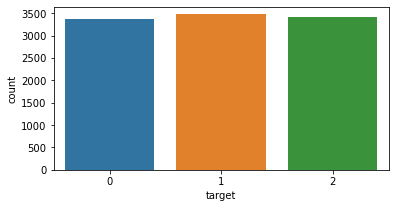

In [9]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="target", data=train)
plt.show()

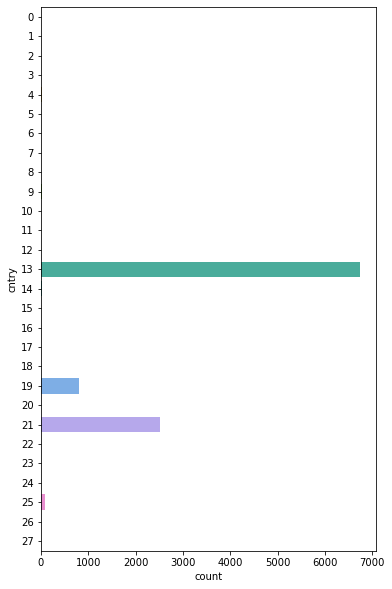

In [10]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="cntry", data=train)
plt.show()

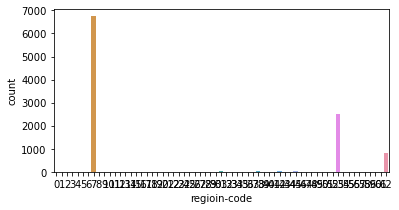

In [11]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="regioin-code", data=train)
plt.show()

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [12]:
train.groupby('target').mean().T

target,0,1,2
session,5129.468452,5063.004610,5185.011108
bash-count,1.980952,1.979833,1.977784
shell-count,0.008333,0.004033,0.007600
exit-count,0.000000,0.000000,0.001754
help-count,0.000000,0.000000,0.000000
passwd-count,0.000595,0.000000,0.000000
chpass-count,0.000000,0.000000,0.000000
usradd-count,0.000000,0.000000,0.000000
sh-count,0.052381,0.054163,0.051155
bslash-count,0.000000,0.000000,0.000000


##### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

In [13]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [14]:
numeric_var_names

['session',
 'bash-count',
 'shell-count',
 'exit-count',
 'help-count',
 'passwd-count',
 'chpass-count',
 'usradd-count',
 'sh-count',
 'bslash-count',
 'fslash-count',
 'perl-count',
 'python-count',
 'chmod-count',
 'sudo-count',
 'rm-count',
 'history-count',
 'cat-count',
 'uname-count',
 'wc-count',
 'crontab-count',
 'w-count',
 'ps-count',
 'free-count',
 'lscpu-count',
 'nproc-count',
 'uptime-count',
 'wget-count',
 'tftp-count',
 'scp-count',
 'ping-count',
 'kill-count',
 'reboot-count',
 'r1-count',
 'r2-count',
 'r3-count',
 'rcd1-size',
 'rcd2_size',
 'mlen-count',
 'url_count',
 'prot',
 'src',
 'ssh_client',
 'duration',
 'rcd_size',
 'continet',
 'cntry',
 'regioin-code',
 'city-name',
 'lat',
 'long',
 'region-code',
 'target']

In [15]:
cat_var_names

[]

In [16]:
from sklearn.preprocessing import LabelEncoder



In [17]:
train['continet'] = train['continet'].astype(str)

In [18]:
ses = LabelEncoder()
continet = LabelEncoder()
cntry = LabelEncoder()
region_code = LabelEncoder()
city_name = LabelEncoder()
target_class = LabelEncoder()

### Data Audit Report

In [19]:
ses.fit(train['session'])
continet.fit(train['continet'])
cntry.fit(train['cntry'])
region_code.fit(train['regioin-code'])
city_name.fit(train['city-name'])
target_class.fit(train['target'])

LabelEncoder()

In [20]:
train['session'] = ses.transform(train['session'])
train['continet'] = continet.transform(train['continet'])
train['cntry'] = cntry.transform(train['cntry'])
train['regioin-code'] = region_code.transform(train['regioin-code'])
train['city-name'] = city_name.transform(train['city-name'])
train['target'] = target_class.transform(train['target'])

In [21]:
train.head()

,session,bash-count,shell-count,exit-count,help-count,passwd-count,chpass-count,usradd-count,sh-count,bslash-count,...,duration,rcd_size,continet,cntry,regioin-code,city-name,lat,long,region-code,target
0,6852,2,0,1,0,0,0,0,0,0,...,0.934411,9,2,13,7,12,-8.950,51.9000,7,2
1,8663,2,0,0,0,0,0,0,0,0,...,0.872554,7,2,13,7,12,-8.950,51.9000,7,2
2,99,1,0,0,0,0,0,0,0,0,...,1.002114,3,2,19,62,51,4.663,51.8656,62,2
3,6762,2,0,0,0,0,0,0,0,0,...,0.956976,6,2,13,7,12,-8.950,51.9000,7,0
4,7546,2,0,0,0,0,0,0,0,0,...,0.896800,10,2,13,7,12,-8.950,51.9000,7,0


### Handling Outlier

In [22]:
train.to_csv('final_encoded_data.csv',index=False)

In [23]:
train = pd.read_csv('final_encoded_data.csv')

#### No missing in train dataset . So , Missing treatment not required .

In [24]:
train.head()

,session,bash-count,shell-count,exit-count,help-count,passwd-count,chpass-count,usradd-count,sh-count,bslash-count,...,duration,rcd_size,continet,cntry,regioin-code,city-name,lat,long,region-code,target
0,6852,2,0,1,0,0,0,0,0,0,...,0.934411,9,2,13,7,12,-8.950,51.9000,7,2
1,8663,2,0,0,0,0,0,0,0,0,...,0.872554,7,2,13,7,12,-8.950,51.9000,7,2
2,99,1,0,0,0,0,0,0,0,0,...,1.002114,3,2,19,62,51,4.663,51.8656,62,2
3,6762,2,0,0,0,0,0,0,0,0,...,0.956976,6,2,13,7,12,-8.950,51.9000,7,0
4,7546,2,0,0,0,0,0,0,0,0,...,0.896800,10,2,13,7,12,-8.950,51.9000,7,0


In [25]:
train.dropna(inplace=True)
X = train.iloc[:,1:-1].values
y = train.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Dummy Variable Creation

In [28]:
#train.isnull().sum()
#train.dropna(inplace=True)
for i in range(1,10):
    if y_test[i]==0:
        y_test[i]=1
    elif y_test[i]==1:
        y_test[i]=0
    else:
        y_test[i]=2

In [29]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Final file for analysis

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9972688255950058


In [33]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.9973


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       824
           1       1.00      1.00      1.00       901
           2       1.00      1.00      1.00       838

    accuracy                           1.00      2563
   macro avg       1.00      1.00      1.00      2563
weighted avg       1.00      1.00      1.00      2563



In [35]:
import pickle
# Saving model to disk of random forest
pickle.dump(model, open('model.pkl','wb'))

In [36]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-1,random_state=42)
model.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.09, random_state=42)

In [37]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9973


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

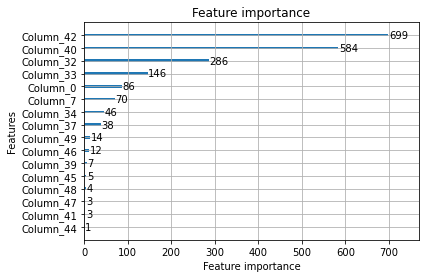

In [38]:
lgb.plot_importance(model)

<AxesSubplot:>

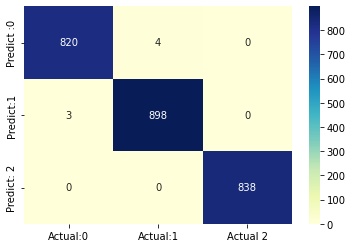

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual:0', 'Actual:1','Actual 2'], 
                                 index=['Predict :0', 'Predict:1','Predict: 2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
#print(cm)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       824
           1       1.00      1.00      1.00       901
           2       1.00      1.00      1.00       838

    accuracy                           1.00      2563
   macro avg       1.00      1.00      1.00      2563
weighted avg       1.00      1.00      1.00      2563



In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8993367147873585


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       824
           1       0.87      0.86      0.87       901
           2       0.91      0.93      0.92       838

    accuracy                           0.90      2563
   macro avg       0.90      0.90      0.90      2563
weighted avg       0.90      0.90      0.90      2563



In [44]:
model_m = RandomForestClassifier(random_state=1)
model_m.fit(X_train[:,:38], y_train)

RandomForestClassifier(random_state=1)

In [45]:
y_pred = model_m.predict(X_test[:,:38])

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.333593445181428


light gbm algorithm

In [47]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train[:,:38],y_train)

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [48]:
y_pred = model.predict(X_test[:,:38])
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.3336


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

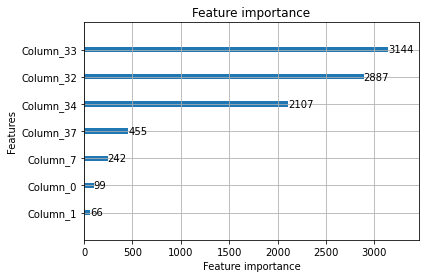

In [49]:
lgb.plot_importance(model)

LightGBM Model accuracy score: 0.9973


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

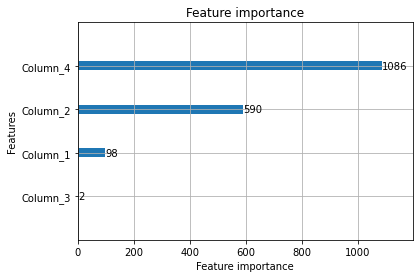

In [50]:
#host based feature prediction
model.fit(X_train[:,38:43],y_train)
y_pred = model.predict(X_test[:,38:43])
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
lgb.plot_importance(model)

LightGBM Model accuracy score: 0.9953


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

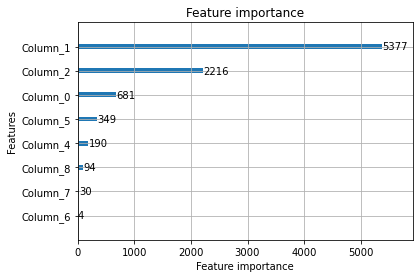

In [51]:
#geography based feature prediction
model.fit(X_train[:,41:-1],y_train)
y_pred = model.predict(X_test[:,41:-1])
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
lgb.plot_importance(model)

### Final list of variable selected for the model building using Select KBest

attack_neptune, attack_normal, attack_satan, count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_same_srv_rate, dst_host_srv_count, flag_S0, flag_SF, last_flag, logged_in, same_srv_rate, serror_rate, service_http

In [52]:
#import pickle
# Saving model to disk of random forest
#pickle.dump(model, open('model.pkl','wb'))

## Model Building

In [53]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
pred = model.predict([X_test[100]])
if pred[0]==0:
    print('predicted: Level 1')
elif pred[0]==1:
    print('predicted: Level 2')
else: 
    print('predicted: Level 3')

predicted: Level 1


### Building logistic Regression

#### 1) LogisticRegression

In [54]:
!pip install lightgbm

In [55]:
!pip install flask

In [56]:
!pip install scapy

#### 2) RidgeClassifier

In [57]:
!pip install scipy

In [58]:
!pip install scikit-learn

In [59]:
!pip install tensorflow

### K-Nearest Neighbors

#### 1) KNeighborsClassifier

#### 3) NearestCentroid

### Discriminant Analysis

#### 1) LinearDiscriminantAnalysis

#### 2) QuadraticDiscriminantAnalysis

### Decision Trees

#### Fine Tuning the parameters

### Building Final Decision Tree Model

#### Feature Relative Importance

## Naive Bayes Model

#### 1) BernoulliNB

#### 2) GaussianNB

### Support Vector Machine (SVM)

#### 1) LinearSVC

#### 2) SVC

### Stochastic Gradient Descent (SGD)

### Neural Network Model

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[817   7   0]
 [  5 896   0]
 [  0   0 838]]


## Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

Bagging-> Building multiple models (typically of the same type) from different subsamples of the training dataset.

Boosting-> Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Voting-> Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1) Bagged Decision Trees

2) Random Forest

3) Extra Trees

#### 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In [61]:
seed = 7


#### 2. Random Forest
Random forest is an extension of bagged decision trees.

#### 3. Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1) AdaBoost

2) Stochastic Gradient Boosting

#### 1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

#### 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

# Save Model

In [62]:
import pickle
# Saving model to disk of random forest
pickle.dump(lr_clf, open('model.pkl','wb'))

NameError: name 'lr_clf' is not defined

# Load Model and Predict

In [ ]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,0,0,229,0.06,0.00,0.04,10,0,0,21,0,0.04,0.00,0]])